# scikitlearn

This notebook shows examples of supervised and unsupervised machine learning using scikitlearn.

In [2]:
# import packages

import numpy as np, pandas as pd, seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline
plt.style.use('seaborn')

In [3]:
# import some data

from sklearn.datasets import load_digits, load_iris, load_wine
digits = load_digits()
iris = load_iris()
wine = load_wine()

In [4]:
# logistic regression

from sklearn.linear_model import LogisticRegression

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target)
clf = LogisticRegression(penalty='l2')
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
print('Accuracy = ', metrics.accuracy_score(ypred, ytest)*100, '%')


Accuracy =  95.77777777777777 %


Accuracy =  97.77777777777777 %


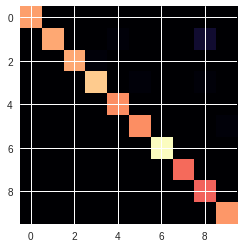

In [5]:
# support vector machine

from sklearn.svm import SVC

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target)

clf = SVC(kernel='linear')
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
print('Accuracy = ', metrics.accuracy_score(ypred, ytest)*100,'%')
plt.imshow(metrics.confusion_matrix(ypred, ytest),
           interpolation='nearest', cmap=plt.cm.magma)
plt.show()

In [6]:
# random forest

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 50)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
print('Accuracy = ', metrics.accuracy_score(ypred, ytest)*100, '%')


Accuracy =  98.22222222222223 %


[[0.50062155]] [15.18551553]
0.9901860276858883


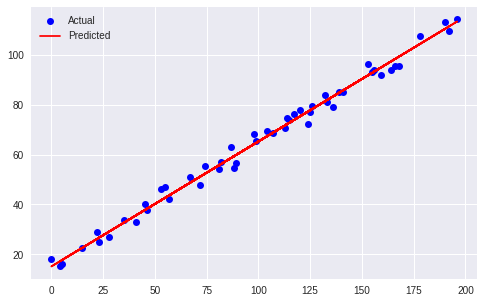

In [7]:
# linear regression

from sklearn.linear_model import LinearRegression

X = np.arange(200)
X = X[:, np.newaxis]
y = 0.5*X + 10
ynoise = np.random.rand(np.shape(y)[0], np.shape(y)[1])*10
y = y + ynoise

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y)

lm = LinearRegression()
lm.fit(Xtrain, ytrain)

ypred = lm.predict(Xtest)

print(lm.coef_, lm.intercept_)
print(lm.score(Xtest, ytest))

fig = plt.figure(figsize=(8,5))
plt.plot(Xtest, ytest, 'o', color='blue')
plt.plot(Xtest, ypred, color='red')
plt.legend(['Actual', 'Predicted']);

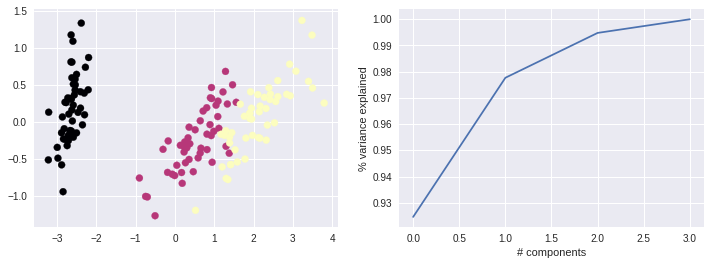

In [8]:
# PCA
from sklearn.decomposition import PCA

X, y = iris.data, iris.target
pca = PCA() # n_components = 0.95, n_components = 10
pca.fit(X)
X_reduced = pca.transform(X)

fig = plt.figure(figsize=(12,4))
fig.add_subplot(1,2,1)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='magma');

# visualize % variance explained
fig.add_subplot(1,2,2)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# components')
plt.ylabel('% variance explained');

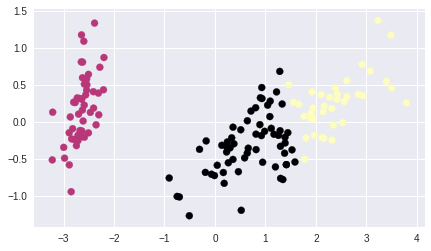

In [9]:
# k-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3) 
kmeans.fit(X)
ypred = kmeans.predict(X)

fig = plt.figure(figsize=(7,4))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=ypred, cmap='magma');

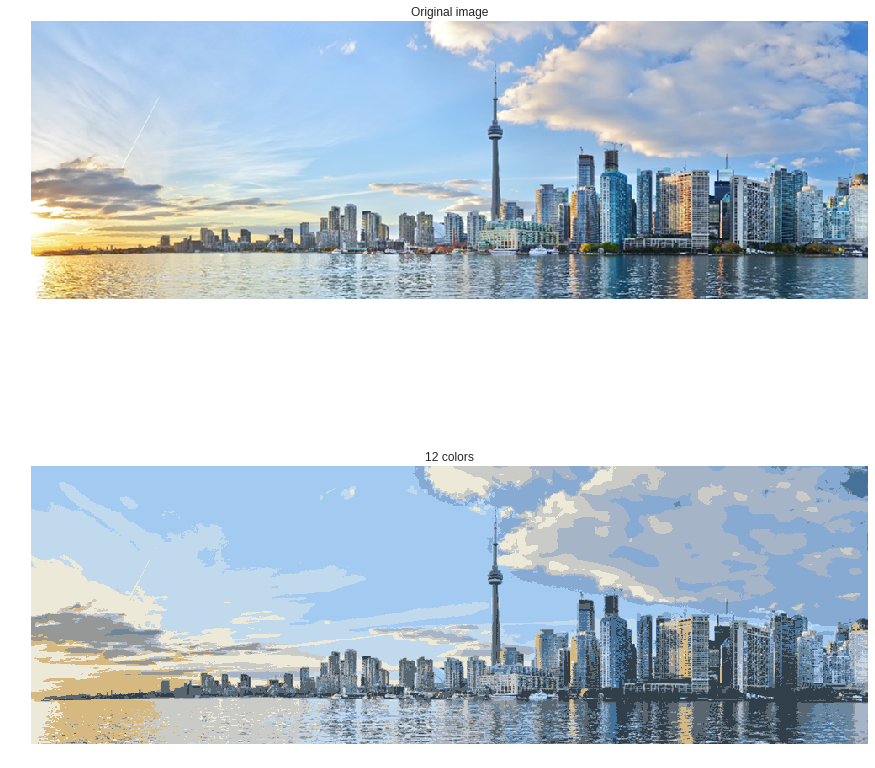

In [10]:
# kmeans on an image

from sklearn.datasets import load_sample_image
from matplotlib.image import imread
myimg = imread("toronto.png")
X = (myimg).reshape(-1, 3)

from sklearn.cluster import MiniBatchKMeans

# reduce the size of the image for speed
n_colors = 12

    
kmeans = MiniBatchKMeans(n_colors)
labels = kmeans.fit_predict(X)
colors = kmeans.cluster_centers_
new_image = colors[labels].reshape(myimg.shape)
new_image = (255 * new_image).astype(np.uint8)

# create and plot the new image

fig = plt.figure(figsize=(15,15))
fig.add_subplot(2,1,1)
plt.imshow(myimg)
plt.grid=False
plt.title('Original image')
plt.axis('off')

fig.add_subplot(2,1,2)
plt.imshow(new_image)
plt.title('{} colors'.format(n_colors))
plt.axis('off');


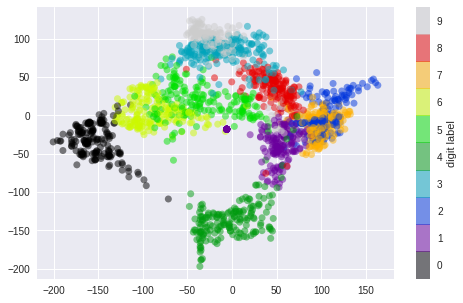

In [11]:
# Isomap

from sklearn.manifold import Isomap

imap = Isomap(n_components=2)
Xreduced = imap.fit_transform(digits.data)

fig = plt.figure(figsize=(8,5))
plt.scatter(Xreduced[:, 0], Xreduced[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10));
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

In [12]:
# K-fold cross validation

from sklearn.model_selection import cross_val_score

# for logistic regression
cv_scores = cross_val_score(clf, digits.data, digits.target, cv=10)
print('Mean CV accuracy = ', np.mean(cv_scores)*100, '%')

Mean CV accuracy =  94.66369356293477 %


In [125]:
# grid search CV with pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import accuracy, f1_score

_, inds= np.where([(y==0) | (y==1)])
X = iris.data[inds,:]
y = iris.target[inds]

# option 1: Pipeline (define names explicitly)
pipe1 = Pipeline([
        ('scale', StandardScaler()),
        ('reduce_dims', PCA(n_components=2)),
        ('clf', SVC(kernel='linear', C=1))])

param_grid1 = dict(reduce_dims__n_components=[1,2,3],
                  clf__C=np.logspace(-4, 1, 6),
                  clf__kernel=['rbf','linear'])

# option 2: make_pipeline (auto-generates names)
pipe2 = make_pipeline(StandardScaler(),
                         PCA(n_components=2),
                        SVC(kernel='linear', C=1))

param_grid2 = dict(pca__n_components=[1,2,3],
                  svc__C=np.logspace(-4, 1, 6),
                  svc__kernel=['rbf','linear'])

grid = GridSearchCV(pipe1, param_grid=param_grid1, scoring=['accuracy', 'f1'], refit ='accuracy',
                    cv=3, n_jobs=1, verbose=0)
grid.fit(X, y)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
#print(grid.cv_results_)


1.0
{'clf__C': 0.0001, 'clf__kernel': 'rbf', 'reduce_dims__n_components': 1}
Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('reduce_dims', PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=0.0001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])


In [128]:
# another gridsearchCV example
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html

from sklearn.datasets import make_hastie_10_2
from sklearn.tree import DecisionTreeClassifier
X, y = make_hastie_10_2(n_samples=8000, random_state=42)

# run grid search
#scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid={'min_samples_split': range(2, 403, 10)},
                  scoring=['accuracy', 'f1'], cv=5, refit='accuracy', return_train_score=True)
gs.fit(X, y)
results = gs.cv_results_

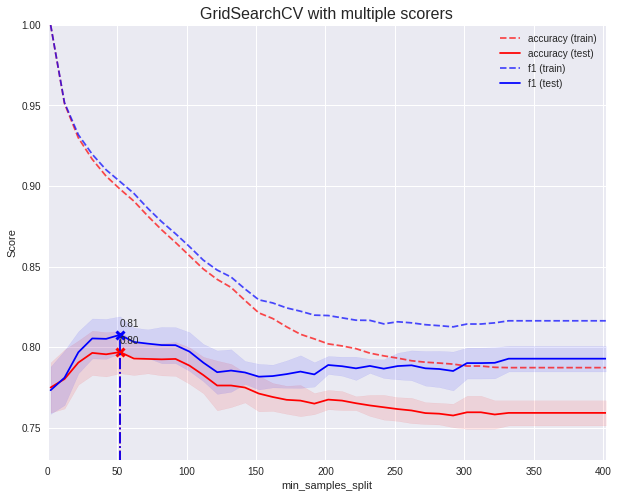

In [138]:
# plot the results

plt.figure(figsize=(10, 8))
plt.title("GridSearchCV with multiple scorers", fontsize=16)
plt.xlabel("min_samples_split")
plt.ylabel("Score")
ax = plt.gca()


# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_min_samples_split'].data, dtype=float)

for scorer, color in zip(['accuracy', 'f1'], ['red', 'blue']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

ax.set_xlim(0, 402)
ax.set_ylim(0.73, 1)
plt.legend(loc="best")
plt.show()

In [ ]:
# validation curve